In [1]:
%display latex

In [2]:
M = Manifold(4, 'M')
X.<t,r,th,ph> = M.chart(r't r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi')
X
#E = G - 8*pi*T

Chart (M, (t, r, th, ph))

In [3]:
g = M.lorentzian_metric('g')
nu = function('nu')
m = function('m')
g[0,0] = -exp(2*nu(r))
g[1,1] = 1/(1-2*m(r)/r)
g[2,2] = r^2
g[3,3] = (r*sin(th))^2
#g.display()

In [4]:
g.display_comp()

g_t,t = -e^(2*nu(r)) 
g_r,r = -1/(2*m(r)/r - 1) 
g_th,th = r^2 
g_ph,ph = r^2*sin(th)^2

In [5]:
g[:]

[     -e^(2*nu(r))                 0                 0                 0]
[                0 -1/(2*m(r)/r - 1)                 0                 0]
[                0                 0               r^2                 0]
[                0                 0                 0     r^2*sin(th)^2]

In [6]:
Ric = g.ricci();#Ric.display()

In [7]:
g.ricci_scalar().display()

r(g): M --> R
   (t, r, th, ph) |--> -2*((r^2 - 2*r*m(r))*(d(nu)/dr)^2 - (r*d(m)/dr - 2*r + 3*m(r))*d(nu)/dr + (r^2 - 2*r*m(r))*d^2(nu)/dr^2 - 2*d(m)/dr)/r^2

In [8]:
G = Ric - 1/2*g.ricci_scalar() * g
G.set_name('G');G.display_comp()

G_t,t = 2*e^(2*nu(r))*d(m)/dr/r^2 
G_r,r = 2*((r^2 - 2*r*m(r))*d(nu)/dr - m(r))/(r^3 - 2*r^2*m(r)) 
G_th,th = ((r^3 - 2*r^2*m(r))*(d(nu)/dr)^2 - r*d(m)/dr - (r^2*d(m)/dr - r^2 + r*m(r))*d(nu)/dr + (r^3 - 2*r^2*m(r))*d^2(nu)/dr^2 + m(r))/r 
G_ph,ph = ((r^3 - 2*r^2*m(r))*(d(nu)/dr)^2 - r*d(m)/dr - (r^2*d(m)/dr - r^2 + r*m(r))*d(nu)/dr + (r^3 - 2*r^2*m(r))*d^2(nu)/dr^2 + m(r))*sin(th)^2/r

In [9]:
u = M.vector_field('u')
u[0] = exp(-nu(r))
u.display();u[:]

[e^(-nu(r)), 0, 0, 0]

In [10]:
g(u,u).display()

g(u,u): M --> R
   (t, r, th, ph) |--> -1

In [11]:
u_form = u.down(g);u_form.display()

-e^nu(r) dt

In [12]:
rho = function('rho')
p = function('p')
T = (rho(r)+p(r))* (u_form * u_form) + p(r) * g
T.set_name('T');T.display_comp()

T_t,t = e^(2*nu(r))*rho(r) 
T_r,r = r*p(r)/(r - 2*m(r)) 
T_th,th = r^2*p(r) 
T_ph,ph = r^2*p(r)*sin(th)^2

In [13]:
T(u,u).display()

T(u,u): M --> R
   (t, r, th, ph) |--> rho(r)

###### Equation d'Einstein

In [14]:
E = G - 8*pi*T;E.set_name('E');E.display_comp()

E_t,t = -2*(4*pi*r^2*e^(2*nu(r))*rho(r) - e^(2*nu(r))*d(m)/dr)/r^2 
E_r,r = -2*(4*pi*r^3*p(r) - (r^2 - 2*r*m(r))*d(nu)/dr + m(r))/(r^3 - 2*r^2*m(r)) 
E_th,th = -(8*pi*r^3*p(r) - (r^3 - 2*r^2*m(r))*(d(nu)/dr)^2 + r*d(m)/dr + (r^2*d(m)/dr - r^2 + r*m(r))*d(nu)/dr - (r^3 - 2*r^2*m(r))*d^2(nu)/dr^2 - m(r))/r 
E_ph,ph = -(8*pi*r^3*p(r) - (r^3 - 2*r^2*m(r))*(d(nu)/dr)^2 + r*d(m)/dr + (r^2*d(m)/dr - r^2 + r*m(r))*d(nu)/dr - (r^3 - 2*r^2*m(r))*d^2(nu)/dr^2 - m(r))*sin(th)^2/r

In [15]:
EE1_sol = solve(E[1,1].expr()==0, diff(nu(r),r))

In [16]:
EE1 = EE1_sol[0];EE1

diff(nu(r), r) == (4*pi*r^3*p(r) + m(r))/(r^2 - 2*r*m(r))

In [17]:
E[3,3] == E[2,2]*sin(th)^2;E[2,2]

-(8*pi*r^3*p(r) - (r^3 - 2*r^2*m(r))*(d(nu)/dr)^2 + r*d(m)/dr + (r^2*d(m)/dr - r^2 + r*m(r))*d(nu)/dr - (r^3 - 2*r^2*m(r))*d^2(nu)/dr^2 - m(r))/r

In [18]:
EE0_sol = solve(E[0,0].expr()==0, diff(m(r),r));EE0_sol

[diff(m(r), r) == 4*pi*r^2*rho(r)]

In [19]:
EE0 = EE0_sol[0];EE0

diff(m(r), r) == 4*pi*r^2*rho(r)

In [20]:
EE1_sol = solve(E[1,1].expr()==0, diff(nu(r),r))
EE1 = EE1_sol[0];EE1

diff(nu(r), r) == (4*pi*r^3*p(r) + m(r))/(r^2 - 2*r*m(r))

In [21]:
E[3,3] == E[2,2]*sin(th)^2;E[2,2]

-(8*pi*r^3*p(r) - (r^3 - 2*r^2*m(r))*(d(nu)/dr)^2 + r*d(m)/dr + (r^2*d(m)/dr - r^2 + r*m(r))*d(nu)/dr - (r^3 - 2*r^2*m(r))*d^2(nu)/dr^2 - m(r))/r

In [22]:
Tu = T.up(g, 0);Tu.display_comp()

X^t_t = -rho(r) 
X^r_r = p(r) 
X^th_th = p(r) 
X^ph_ph = p(r)

In [23]:
nabla = g.connection();nabla.display()

Gam^t_t,r = d(nu)/dr 
Gam^t_r,t = d(nu)/dr 
Gam^r_t,t = (r*e^(2*nu(r)) - 2*e^(2*nu(r))*m(r))*d(nu)/dr/r 
Gam^r_r,r = (r*d(m)/dr - m(r))/(r^2 - 2*r*m(r)) 
Gam^r_th,th = -r + 2*m(r) 
Gam^r_ph,ph = -(r - 2*m(r))*sin(th)^2 
Gam^th_r,th = 1/r 
Gam^th_th,r = 1/r 
Gam^th_ph,ph = -cos(th)*sin(th) 
Gam^ph_r,ph = 1/r 
Gam^ph_th,ph = cos(th)/sin(th) 
Gam^ph_ph,r = 1/r 
Gam^ph_ph,th = cos(th)/sin(th)

In [24]:
dTu = nabla(Tu);divT = dTu.trace(0,2);divT.display()

((p(r) + rho(r))*d(nu)/dr + d(p)/dr) dr

In [25]:
divT[:]

[0, (p(r) + rho(r))*d(nu)/dr + d(p)/dr, 0, 0]

In [26]:
divT[1]

(p(r) + rho(r))*d(nu)/dr + d(p)/dr

In [27]:
EE2_sol = solve(divT[1].expr()==0, diff(p(r),r))
EE2 = EE2_sol[0];EE2


diff(p(r), r) == -(p(r) + rho(r))*diff(nu(r), r)

In [28]:
for eq in [EE0, EE1, EE2]:
    show(eq)

diff(m(r), r) == 4*pi*r^2*rho(r)

diff(nu(r), r) == (4*pi*r^3*p(r) + m(r))/(r^2 - 2*r*m(r))

diff(p(r), r) == -(p(r) + rho(r))*diff(nu(r), r)

In [29]:
var('k', domain='real');p_eos(r) = k*rho(r)^2;p_eos(r)

k*rho(r)^2

In [30]:
EE1_rho = EE1.substitute_function(p, p_eos);EE1_rho

diff(nu(r), r) == (4*pi*k*r^3*rho(r)^2 + m(r))/(r^2 - 2*r*m(r))

In [31]:
EE2_rho = EE2.substitute_function(p, p_eos);EE2_rho

2*k*rho(r)*diff(rho(r), r) == -(k*rho(r)^2 + rho(r))*diff(nu(r), r)

In [32]:
EE2_rho = (EE2_rho / (2*k*rho(r))).simplify_full();EE2_rho

diff(rho(r), r) == -1/2*(k*rho(r) + 1)*diff(nu(r), r)/k

In [33]:
EE2_rho = EE2_rho.subs({diff(nu(r),r): EE1_rho.rhs()}).simplify_full()
EE2_rho

diff(rho(r), r) == -1/2*(4*pi*k^2*r^3*rho(r)^3 + 4*pi*k*r^3*rho(r)^2 + k*m(r)*rho(r) + m(r))/(k*r^2 - 2*k*r*m(r))

In [34]:
for eq in [EE0, EE1_rho, EE2_rho]: show(eq)

diff(m(r), r) == 4*pi*r^2*rho(r)

diff(nu(r), r) == (4*pi*k*r^3*rho(r)^2 + m(r))/(r^2 - 2*r*m(r))

diff(rho(r), r) == -1/2*(4*pi*k^2*r^3*rho(r)^3 + 4*pi*k*r^3*rho(r)^2 + k*m(r)*rho(r) + m(r))/(k*r^2 - 2*k*r*m(r))

In [35]:
eqs = [EE0, EE1_rho, EE2_rho]

In [36]:
k0 = 1/4;rhs = [eq.rhs().subs(k=k0) for eq in eqs];rhs

[4*pi*r^2*rho(r),
 (pi*r^3*rho(r)^2 + m(r))/(r^2 - 2*r*m(r)),
 -1/2*(pi*r^3*rho(r)^3 + 4*pi*r^3*rho(r)^2 + m(r)*rho(r) + 4*m(r))/(r^2 - 2*r*m(r))]

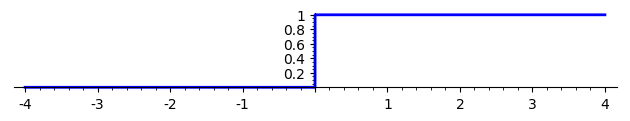

In [37]:
plot(unit_step(x), (x,-4,4), thickness=2, aspect_ratio=1)